# Project #2 Web Scraping
## Alex Barkovitch

In [2]:
import requests
import time
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#create a function to get a webpage
def get_web_page(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        return response.text
    else:
        print(f"Oops! Received status code {status}")
        return ""

# Scrape data from a webpage and save to dataframes

In [4]:
#the url used for this program
url='https://www.hockey-reference.com/teams/NJD/'
#turn the page into soup
page = get_web_page(url)
soup = bs(page)

In [5]:
#use soup.prettify to display webpage code
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html class="no-js" data-root="/home/hr/build" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202404032" rel="dns-prefetch"/>
  <!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->
  <script async="true" type="text/javascript">
   (function() {
  var host = window.location.hostname;
  var element = document.createElement('script');
  var firstScript = document.getElementsByTagName('script')[0];
  var url = 'https://cmp.inmobi.com'
    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js?tag_version=V3');
  var uspTries = 0;
  var uspTriesLimit = 3;
  element.async = true;
  element.type = 'text/javascript';
  element.src = url;

  firstScript.parentNode.insertBefore(element, firstScript);

  function makeStub() {
    var TCF_LOCATOR_NAME = '__tcf

bs4.BeautifulSoup

In [6]:
#find the roster stats table to pull player, position, and salary data from
roster_table = soup.find(id = 'roster', class_='stats_table').tbody #when using class as an attribute to find values, need underscore after
#display everything inside the table
print(roster_table)

<tbody><tr><th class="center" data-stat="number" scope="row">34</th><td class="left" csk="Allen,Jake" data-append-csv="allenja01" data-stat="player"><a href="/players/a/allenja01.html">Jake Allen</a></td><td class="right" data-stat="flag"><span class="f-i f-ca" style="">ca</span></td><td class="center" csk="5:Allen:Jake" data-stat="pos">G</td><td class="center" data-stat="age">33</td><td class="right" csk="74.0" data-stat="height">6-2</td><td class="right" data-stat="weight">195</td><td class="center" data-stat="shoots_and_catches">-/L</td><td class="right" data-stat="years_experience">10</td><td class="left" csk="19900807" data-stat="birth_date">August 7, 1990</td><td class="left" csk="1.04.Allen,Jake" data-stat="summary">4-4-0, 2.90 GAA</td><td class="right" data-stat="salary"> $1,950,000</td><td class="left" data-stat="draft">2008 STL 2nd (34)</td></tr>
<tr><th class="center" data-stat="number" scope="row">88</th><td class="left" csk="Bahl,Kevin" data-append-csv="bahlke01" data-stat

In [7]:
#this function gets player names, positions, and salaries
def get_players(soup):
    player_list = [ ] #create an empty list for players, positions, salary
    
    #loop through each row in the roster table and pull out specific columns
    for row in roster_table.find_all('tr'):
        #get player names
        player = row.find(attrs={'data-stat':'player'}).text
        #get player positions
        position= row.find(attrs={'data-stat':'pos'}).text
        #get player salary
        sal= row.find(attrs={'data-stat':'salary'}).text
        
        #append player data to player list
        player_list.append({'player':player,'pos':position, 'salary':sal})
        
    
    time.sleep(3) #3 second sleep for websites crawl delay
    #display the list
    print("Player names, positions, and salary: ", player_list) 
    #return lists
    return(player_list) 


In [8]:
#store in a dataframe and view
player_df = pd.DataFrame(get_players(soup))
player_df

Player names, positions, and salary:  [{'player': 'Jake Allen', 'pos': 'G', 'salary': ' $1,950,000'}, {'player': 'Kevin Bahl', 'pos': 'D', 'salary': ' $900,000'}, {'player': 'Jesper Bratt', 'pos': 'F', 'salary': ' $5,000,000'}, {'player': 'Nick DeSimone', 'pos': 'D', 'salary': ' $775,000'}, {'player': 'Nolan Foote', 'pos': 'F', 'salary': ' $832,500'}, {'player': 'Brian Halonen', 'pos': 'F', 'salary': ' $832,500'}, {'player': 'Erik Haula', 'pos': 'F', 'salary': ' $2,900,000'}, {'player': 'Nico Hischier\xa0(C)', 'pos': 'F', 'salary': ' $7,750,000'}, {'player': 'Alexander Holtz', 'pos': 'F', 'salary': ' $832,500'}, {'player': 'Jack Hughes', 'pos': 'F', 'salary': ' $8,500,000'}, {'player': 'Luke Hughes', 'pos': 'D', 'salary': ' $832,500'}, {'player': 'Kaapo Kahkonen', 'pos': 'G', 'salary': ' $2,900,000'}, {'player': 'Curtis Lazar', 'pos': 'F', 'salary': ' $1,000,000'}, {'player': 'Kurtis MacDermid', 'pos': 'D', 'salary': ' $1,000,000'}, {'player': 'John Marino', 'pos': 'D', 'salary': ' $5,

,player,pos,salary
0,Jake Allen,G,"$1,950,000"
1,Kevin Bahl,D,"$900,000"
2,Jesper Bratt,F,"$5,000,000"
3,Nick DeSimone,D,"$775,000"
4,Nolan Foote,F,"$832,500"
5,Brian Halonen,F,"$832,500"
6,Erik Haula,F,"$2,900,000"
7,Nico Hischier (C),F,"$7,750,000"
8,Alexander Holtz,F,"$832,500"
9,Jack Hughes,F,"$8,500,000"


In [9]:
#a function which goes through the player hyperlinks to pull data
def get_player_games(soup):
    stats_list = [ ] #create an empty list to store data
    
    summary_table = soup.find(class_ = 'players', id = 'info').find('h1').text #find the name of the player
    summary = summary_table.strip('\n') #without this, player name would show up as "\nPlayer\n"
    stats_table = soup.find(id = 'stats_basic_plus_nhl').tbody #find the stats table we want to pull data from
    for row in stats_table.find_all('tr'): #loop through the rows in the table to and pull out specific columns
        season = row.find(attrs={'data-stat' : 'season'}).text #finds the season year
        team = row.find(attrs={'data-stat' : 'team_id'}).text #finds which team the player was on that season
        games = row.find(attrs={'data-stat' : 'games_played'}) #finds the amount of games played for that season
        if games is not None: #because goalies and players have different data-stat values for amount of games, when looking for the data stats goalie games will return as none 
            games = games.text #if not a goalie, save text under the 'games_played' 
        else:
            games = row.find(attrs={'data-stat' : 'games_goalie'}).text #if goalie, find and save text stored under data-stat 'games_goalie'

        stats_list.append({'player' : summary, 'season' : season, 'team' : team, 'games played' : games}) #append the players name, season, team, and games played to the list
    time.sleep(3)  #3 second sleep for websites crawl delay
    return(stats_list) #return the list


In [10]:
url_base='https://hockey-reference.com' #base site to add before href 
player_url_list = [ ] #create an empty list for the player urls
for row in roster_table.find_all('tr'):
    #get the urls hyperlinked to player names
    player_url = url_base + row.find(attrs={'data-stat':'player'}).a['href'] #find values where data stat is equal to team and attach the link to base url for webpage
    #append player urls to player url list
    player_url_list.append(player_url) 

print("Urls hyperlinked to player names:\n", player_url_list)

Urls hyperlinked to player names:
 ['https://hockey-reference.com/players/a/allenja01.html', 'https://hockey-reference.com/players/b/bahlke01.html', 'https://hockey-reference.com/players/b/brattje01.html', 'https://hockey-reference.com/players/d/desimni01.html', 'https://hockey-reference.com/players/f/footeno01.html', 'https://hockey-reference.com/players/h/halonbr01.html', 'https://hockey-reference.com/players/h/haulaer01.html', 'https://hockey-reference.com/players/h/hischni01.html', 'https://hockey-reference.com/players/h/holtzal01.html', 'https://hockey-reference.com/players/h/hugheja03.html', 'https://hockey-reference.com/players/h/hughelu01.html', 'https://hockey-reference.com/players/k/kahkoka01.html', 'https://hockey-reference.com/players/l/lazarcu01.html', 'https://hockey-reference.com/players/m/macdeku01.html', 'https://hockey-reference.com/players/m/marinjo01.html', 'https://hockey-reference.com/players/m/meierti01.html', 'https://hockey-reference.com/players/m/merceda01.htm

In [11]:
player_games = pd.DataFrame([])
for player in player_url_list: #loop through player url list
    page = get_web_page(player) #call get_web_page function for player
    soup = bs(page) #converts webpage into soup
    player_games = pd.concat([player_games, pd.DataFrame(get_player_games(soup))]) #pulls players from the soup
player_games

,player,season,team,games played
0,Jake Allen,2012-13,STL,15
1,Jake Allen,2014-15,STL,37
2,Jake Allen,2015-16,STL,47
3,Jake Allen,2016-17,STL,61
4,Jake Allen,2017-18,STL,59
...,...,...,...,...
10,Chris Tierney,2022-23,MTL,23
11,Chris Tierney,2023-24,NJD,46
0,Maxwell Willman,2021-22,PHI,41
1,Maxwell Willman,2022-23,PHI,9


# Data analysis and visualization

## How many players does the NJ Devils have for each position?

In [23]:
#lets look at a summary the players for the NJ Devils and what position each of them play
#for this question, we only need player and position columns. Save them to player_position
player_position = player_df[['player','pos']]
#sort the players by their position
position_summary = player_position.sort_values(by = 'pos')
position_summary

,player,pos
10,Luke Hughes,D
17,Simon Nemec,D
14,John Marino,D
13,Kurtis MacDermid,D
20,Jonas Siegenthaler,D
21,Brendan Smith,D
3,Nick DeSimone,D
1,Kevin Bahl,D
6,Erik Haula,F
7,Nico Hischier (C),F


In [18]:
#now lets count the values to see how many players there are for each position
position = player_df.groupby('pos')['player'].count().reset_index()
#display position in order of which has the most players
position = position.sort_values(by = 'player', ascending = False)
position

,pos,player
1,F,14
0,D,8
2,G,2


###  This data shows us that the NJ Devils have 14 players in position F, 8 players in position D, and 2 players in position G.

## What are the trends for player salary? Which players are paid the most? Graph the results

In [26]:
#to answer this question, sort the dataframe in order of descending salary amounts
#start by converting to numeric values and strip the dollar sign
player_df['salary'] = pd.to_numeric(player_df['salary'].replace('[\$,]', '', regex=True), errors='coerce')
#sort the values in order from highest salary to lowest for each player
salary_summary = player_df.sort_values(by = 'salary', ascending = False)
salary_summary

,player,pos,salary
9,Jack Hughes,F,8500000.0
7,Nico Hischier (C),F,7750000.0
15,Timo Meier,F,6000000.0
14,John Marino,D,5250000.0
2,Jesper Bratt,F,5000000.0
19,Ondrej Palat,F,3580000.0
11,Kaapo Kahkonen,G,2900000.0
6,Erik Haula,F,2900000.0
20,Jonas Siegenthaler,D,2750000.0
0,Jake Allen,G,1950000.0


In [251]:
#players with top 3 highest salaries
salary_summary[:3]

,player,pos,salary
9,Jack Hughes,F,8500000.0
7,Nico Hischier (C),F,7750000.0
15,Timo Meier,F,6000000.0


### The above table shows us that Jack Hughes has the highest salary out of all players on the NJ Devils team. Nico Hischier has the second highest, and Timo Meier has the third highest. All of them play position F, so you can infer that F is the best paying position to play on this team right now. You can see the overall trend in player salaries color coded by position in the graph below.

[Text(0, 0, 'Jake Allen'),
 Text(1, 0, 'Kevin Bahl'),
 Text(2, 0, 'Jesper Bratt'),
 Text(3, 0, 'Nick DeSimone'),
 Text(4, 0, 'Nolan Foote'),
 Text(5, 0, 'Brian Halonen'),
 Text(6, 0, 'Erik Haula'),
 Text(7, 0, 'Nico Hischier\xa0(C)'),
 Text(8, 0, 'Alexander Holtz'),
 Text(9, 0, 'Jack Hughes'),
 Text(10, 0, 'Luke Hughes'),
 Text(11, 0, 'Kaapo Kahkonen'),
 Text(12, 0, 'Curtis Lazar'),
 Text(13, 0, 'Kurtis MacDermid'),
 Text(14, 0, 'John Marino'),
 Text(15, 0, 'Timo Meier'),
 Text(16, 0, 'Dawson Mercer'),
 Text(17, 0, 'Simon Nemec'),
 Text(18, 0, 'Tomas Nosek'),
 Text(19, 0, 'Ondrej Palat'),
 Text(20, 0, 'Jonas Siegenthaler'),
 Text(21, 0, 'Brendan Smith'),
 Text(22, 0, 'Chris Tierney'),
 Text(23, 0, 'Max Willman')]

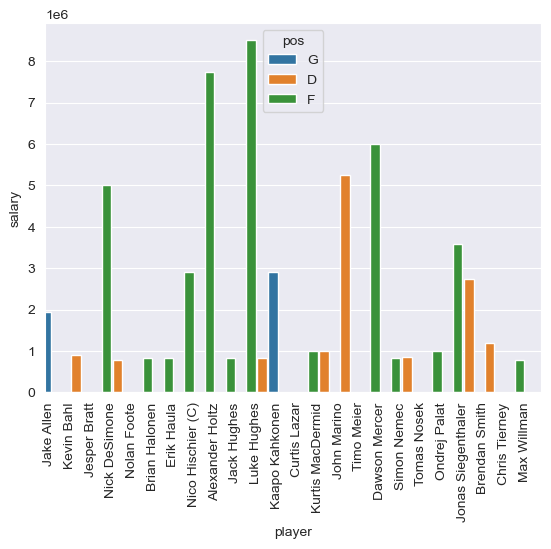

In [28]:
#create a bar chart that shows the players current salary color codes based on position
#set the graph style to darkgrid
sns.set_style('darkgrid')
#create a bar plot that shows the salary of each player, colored based on their position
ax = sns.barplot(x = "player", y = "salary", hue = 'pos', data = player_df, width = 1.4, errorbar= None)
#rotate the x axis labels for better clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

[Text(0, 0, 'Jake Allen'),
 Text(1, 0, 'Kevin Bahl'),
 Text(2, 0, 'Jesper Bratt'),
 Text(3, 0, 'Nick DeSimone'),
 Text(4, 0, 'Nolan Foote'),
 Text(5, 0, 'Brian Halonen'),
 Text(6, 0, 'Erik Haula'),
 Text(7, 0, 'Nico Hischier\xa0(C)'),
 Text(8, 0, 'Alexander Holtz'),
 Text(9, 0, 'Jack Hughes'),
 Text(10, 0, 'Luke Hughes'),
 Text(11, 0, 'Kaapo Kahkonen'),
 Text(12, 0, 'Curtis Lazar'),
 Text(13, 0, 'Kurtis MacDermid'),
 Text(14, 0, 'John Marino'),
 Text(15, 0, 'Timo Meier'),
 Text(16, 0, 'Dawson Mercer'),
 Text(17, 0, 'Simon Nemec'),
 Text(18, 0, 'Tomas Nosek'),
 Text(19, 0, 'Ondrej Palat'),
 Text(20, 0, 'Jonas Siegenthaler'),
 Text(21, 0, 'Brendan Smith'),
 Text(22, 0, 'Chris Tierney'),
 Text(23, 0, 'Max Willman')]

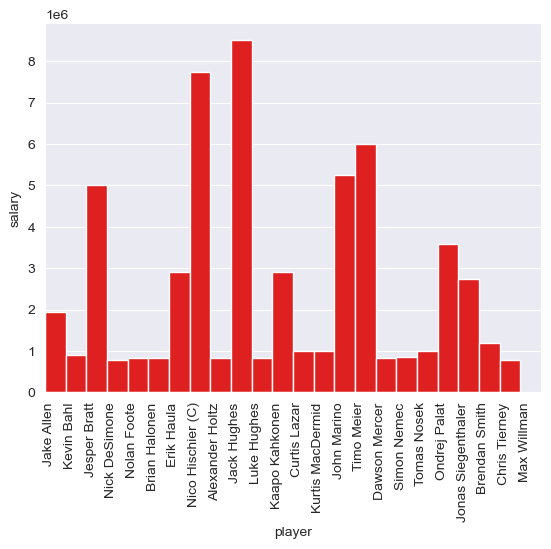

In [31]:
#the same graph without position data
#set the graph style to darkgrid
sns.set_style('darkgrid')
#create a bar plot that shows the salary of each player, colored based on their position
ax = sns.barplot(x = "player", y = "salary", data = player_df, width = 1, color = "red", errorbar= None)
#rotate the x axis labels for better clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

## Look at the stats for each player currently on the NJ Devils team. How many games have each of them played over their entire career in the NHL?

C:\Users\alexb\AppData\Local\Temp\ipykernel_47368\3932899503.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize = "10")


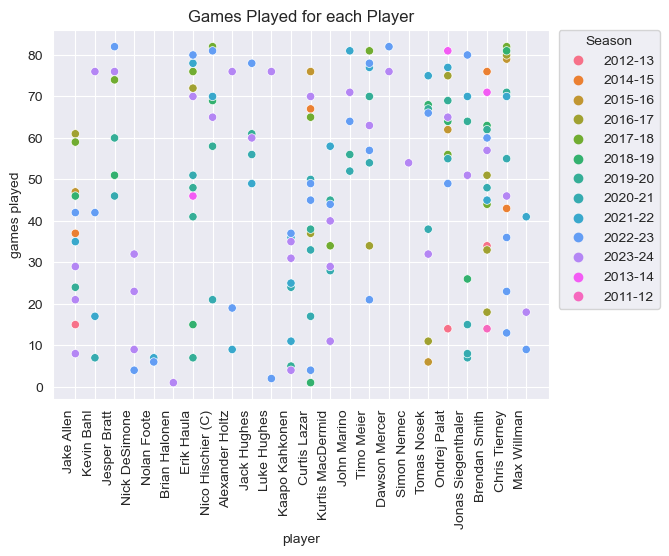

In [32]:
#create a scatter plot that shows amount of games played by each player in NJD and color codes based on season
#convert salary to numeric value and drop the dollar sign
player_games['games played'] = pd.to_numeric(player_games['games played'], errors='coerce')
#drop null values for the graph
data = player_games.dropna
#set the graph style to darkgrid
sns.set_style('darkgrid')
#create a bar plot that shows the salary of each player, colored based on their position
plot = sns.scatterplot(x = "player", y = "games played", hue = "season", data = player_games)
#rotate the x axis labels for better clarity
plot.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize = "10")
#label the plot
plt.title('Games Played for each Player')
#place the legend outside the plot and set label
plt.legend(title = 'Season', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


## What are the maximum and minimum amount of games played in one season for each player?

In [257]:
#display each player and their highest and lowest amount of games played in a season
total_games = player_games.groupby('player').agg({'games played' : ['min','max']})
total_games

games played    
                            min max
player                             
Alexander Holtz               9  76
Brendan Smith                14  76
Brian Halonen                 1   1
Chris Tierney                13  82
Curtis Lazar                  1  76
Dawson Mercer                76  82
Erik Haula                    7  80
Jack Hughes                  49  78
Jake Allen                    8  61
Jesper Bratt                 46  82
John Marino                  52  81
Jonas Siegenthaler            7  80
Kaapo Kähkönen                4  37
Kevin Bahl                    7  76
Kurtis MacDermid             11  58
Luke Hughes                   2  76
Maxwell Willman               9  41
Nick DeSimone                 4  32
Nico Hischier                21  82
Nolan Foote                   6   7
Ondřej Palát                 14  81
Simon Nemec                  54  54
Timo Meier                   21  81
Tomáš Nosek                   6  75

## What is the overall average amount of games played each season? 

In [258]:
#take the mean of all rows in the games played column, and transfer to int to remove decimal places
average_games = player_games['games played'].mean().astype(int)
average_games

47

### An average of 47 games is played each season by each player on the NJ Devils

## Which player has played with the NJ Devils the most?

In [259]:
#pull out rows where the team is equal to NJD
teams = player_games[player_games['team'] == 'NJD']
#group by player and team, then sum the total amount of games played from each season
group_teams = teams.groupby(['player','team'], as_index=False)['games played'].sum()
#sort in descending order so it's easier to pull the player with the most games
njd_games = group_teams.sort_values(by = 'games played', ascending = False)
njd_games

,player,team,games played
9,Jesper Bratt,NJD,465
18,Nico Hischier,NJD,446
7,Jack Hughes,NJD,304
5,Dawson Mercer,NJD,240
11,Jonas Siegenthaler,NJD,209
6,Erik Haula,NJD,150
13,Kevin Bahl,NJD,142
10,John Marino,NJD,135
1,Brendan Smith,NJD,117
20,Ondřej Palát,NJD,114


In [260]:
most_games = njd_games[:1]
most_games

,player,team,games played
9,Jesper Bratt,NJD,465


### Jesper Bratt has played a total of 465 games with the NJ Devils, more than any other player currently on the team!